In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import catboost
%matplotlib inline

In [67]:
%timeit
df = pd.read_csv('features_matrix.csv', index_col='NUM_PERS')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123460 entries, 15954 to 90630105
Columns: 357 entries, mt_M1 to sum_mt_impayes_obs
dtypes: float64(206), int64(149), object(2)
memory usage: 337.2+ MB


In [5]:
df.columns

Index([u'mt_M1', u'mt_M2', u'mt_M3', u'sum_bad_debt', u'target_bad',
       u'AVG_PRELEV_12M', u'AVG_RETR_CHQ_12M', u'AVG_RETR_GAB_12M',
       u'AVG_ENC_CHQ_12M', u'AVG_PAY_CARTE_LOC_12M',
       ...
       u'cmc_3_6', u'nbjdebut_3_6', u'solde_fdp_3_6', u'solde_moy_3_6',
       u'cmc_6_12', u'nbjdebut_6_12', u'solde_fdp_6_12', u'solde_moy_6_12',
       u'sum_nb_impayes_obs', u'sum_mt_impayes_obs'],
      dtype='object', length=357)

In [68]:
features = list(df.columns)

numeric_features = []
categorical_features = []

for dtype, feature in zip(df.dtypes[2:], df.columns[2:]):
    if dtype == object:
        #print(column)
        #print(train_data[column].describe())
        categorical_features.append(feature)
    else:
        numeric_features.append(feature)
categorical_features

['last_trx_type', 'grp_oper_MODE']

In [69]:
keys = list(df.columns)
values = list(df.dtypes)
dictionary = dict(zip(keys, values))

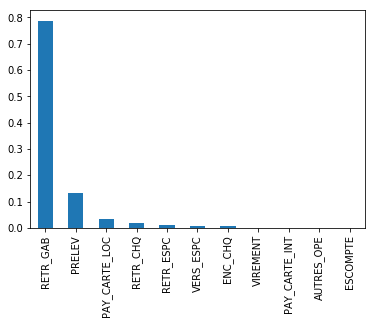

In [16]:
df.grp_oper_MODE.value_counts(normalize=True).plot(kind='bar')

In [21]:
avg_impaye_by_nb = df.groupby('sum_nb_impayes_obs',  as_index=False)['sum_mt_impayes_obs'].agg(['mean','size'])

In [22]:
avg_impaye_by_nb.head(20)

,mean,size
sum_nb_impayes_obs,,
0,0.000000,103123
1,1376.404869,6741
2,2704.294357,3408
3,4023.670188,2075
4,5568.380157,1270
5,6863.932742,970
6,8204.998068,823
7,9147.940144,557
8,10783.019295,482


In [77]:
clean_df = df[df['sum_mt_impayes_obs'] <= 2000]

In [79]:
# drop leak colums
clean_df.drop(['mt_M1', 'mt_M2', 'mt_M3', 'sum_bad_debt', 'sum_nb_impayes_obs', 'sum_mt_impayes_obs'], inplace=True, axis=1)

c:\tools\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
clean_df['target_bad'].mean()

0.035851391510925236

In [73]:
clean_df['target_bad'].value_counts(normalize=True)

0    0.964149
1    0.035851
Name: target_bad, dtype: float64

In [80]:
# sortir var target (Y) + X
Y = clean_df['target_bad']
X = clean_df.drop(['target_bad','grp_oper_MODE', 'last_trx_type'], axis=1)

In [81]:
# Train / Test split
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.6, random_state=198585)

c:\tools\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [83]:
import gc

In [84]:
gc.collect()

55

In [85]:
del(df)

In [86]:
# first model SANS elimination outliers

# init with default parameters
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42
)

model.fit(
    X_train, y_train,
    eval_set = (X_test, y_test),
    verbose=True, plot=False, use_best_model=True)

%timeit

0:	learn: 0.4994419	test: 0.4991561	best: 0.4991561 (0)	total: 391ms	remaining: 6m 31s
1:	learn: 0.3767814	test: 0.3761102	best: 0.3761102 (1)	total: 552ms	remaining: 4m 35s
2:	learn: 0.3007306	test: 0.2997707	best: 0.2997707 (2)	total: 720ms	remaining: 3m 59s
3:	learn: 0.2506430	test: 0.2494328	best: 0.2494328 (3)	total: 859ms	remaining: 3m 33s
4:	learn: 0.2157597	test: 0.2144642	best: 0.2144642 (4)	total: 1.01s	remaining: 3m 20s
5:	learn: 0.1938047	test: 0.1923545	best: 0.1923545 (5)	total: 1.14s	remaining: 3m 8s
6:	learn: 0.1772708	test: 0.1757320	best: 0.1757320 (6)	total: 1.29s	remaining: 3m 3s
7:	learn: 0.1663851	test: 0.1647457	best: 0.1647457 (7)	total: 1.41s	remaining: 2m 54s
8:	learn: 0.1571753	test: 0.1555325	best: 0.1555325 (8)	total: 1.56s	remaining: 2m 51s
9:	learn: 0.1515936	test: 0.1498932	best: 0.1498932 (9)	total: 1.68s	remaining: 2m 46s
10:	learn: 0.1471913	test: 0.1454321	best: 0.1454321 (10)	total: 1.82s	remaining: 2m 43s
11:	learn: 0.1438969	test: 0.1421663	best: 

95:	learn: 0.1232561	test: 0.1285685	best: 0.1285174 (81)	total: 11.1s	remaining: 1m 44s
96:	learn: 0.1231767	test: 0.1285890	best: 0.1285174 (81)	total: 11.2s	remaining: 1m 44s
97:	learn: 0.1230450	test: 0.1285834	best: 0.1285174 (81)	total: 11.3s	remaining: 1m 44s
98:	learn: 0.1230098	test: 0.1285781	best: 0.1285174 (81)	total: 11.4s	remaining: 1m 43s
99:	learn: 0.1228668	test: 0.1285550	best: 0.1285174 (81)	total: 11.5s	remaining: 1m 43s
100:	learn: 0.1228134	test: 0.1285429	best: 0.1285174 (81)	total: 11.6s	remaining: 1m 43s
101:	learn: 0.1227289	test: 0.1285292	best: 0.1285174 (81)	total: 11.7s	remaining: 1m 43s
102:	learn: 0.1226225	test: 0.1285049	best: 0.1285049 (102)	total: 11.8s	remaining: 1m 43s
103:	learn: 0.1225297	test: 0.1285265	best: 0.1285049 (102)	total: 11.9s	remaining: 1m 42s
104:	learn: 0.1224530	test: 0.1285230	best: 0.1285049 (102)	total: 12s	remaining: 1m 42s
105:	learn: 0.1223778	test: 0.1285323	best: 0.1285049 (102)	total: 12.1s	remaining: 1m 42s
106:	learn: 0

187:	learn: 0.1149720	test: 0.1282119	best: 0.1280461 (165)	total: 21.2s	remaining: 1m 31s
188:	learn: 0.1149259	test: 0.1282132	best: 0.1280461 (165)	total: 21.3s	remaining: 1m 31s
189:	learn: 0.1148338	test: 0.1281764	best: 0.1280461 (165)	total: 21.4s	remaining: 1m 31s
190:	learn: 0.1147776	test: 0.1281634	best: 0.1280461 (165)	total: 21.5s	remaining: 1m 30s
191:	learn: 0.1147335	test: 0.1281663	best: 0.1280461 (165)	total: 21.6s	remaining: 1m 30s
192:	learn: 0.1147125	test: 0.1281648	best: 0.1280461 (165)	total: 21.7s	remaining: 1m 30s
193:	learn: 0.1146619	test: 0.1281576	best: 0.1280461 (165)	total: 21.8s	remaining: 1m 30s
194:	learn: 0.1145042	test: 0.1281747	best: 0.1280461 (165)	total: 21.9s	remaining: 1m 30s
195:	learn: 0.1144275	test: 0.1281737	best: 0.1280461 (165)	total: 22s	remaining: 1m 30s
196:	learn: 0.1143061	test: 0.1281748	best: 0.1280461 (165)	total: 22.1s	remaining: 1m 30s
197:	learn: 0.1142331	test: 0.1281643	best: 0.1280461 (165)	total: 22.2s	remaining: 1m 29s
1

278:	learn: 0.1078484	test: 0.1280318	best: 0.1278595 (235)	total: 30.9s	remaining: 1m 19s
279:	learn: 0.1077868	test: 0.1280385	best: 0.1278595 (235)	total: 31s	remaining: 1m 19s
280:	learn: 0.1076871	test: 0.1280480	best: 0.1278595 (235)	total: 31.2s	remaining: 1m 19s
281:	learn: 0.1076188	test: 0.1280471	best: 0.1278595 (235)	total: 31.3s	remaining: 1m 19s
282:	learn: 0.1075490	test: 0.1280312	best: 0.1278595 (235)	total: 31.4s	remaining: 1m 19s
283:	learn: 0.1074809	test: 0.1280259	best: 0.1278595 (235)	total: 31.5s	remaining: 1m 19s
284:	learn: 0.1073964	test: 0.1279709	best: 0.1278595 (235)	total: 31.6s	remaining: 1m 19s
285:	learn: 0.1073117	test: 0.1279884	best: 0.1278595 (235)	total: 31.7s	remaining: 1m 19s
286:	learn: 0.1071886	test: 0.1280041	best: 0.1278595 (235)	total: 31.8s	remaining: 1m 19s
287:	learn: 0.1071396	test: 0.1280110	best: 0.1278595 (235)	total: 31.9s	remaining: 1m 18s
288:	learn: 0.1071098	test: 0.1280084	best: 0.1278595 (235)	total: 32s	remaining: 1m 18s
289

371:	learn: 0.1013838	test: 0.1281844	best: 0.1278595 (235)	total: 41.6s	remaining: 1m 10s
372:	learn: 0.1013580	test: 0.1281917	best: 0.1278595 (235)	total: 41.7s	remaining: 1m 10s
373:	learn: 0.1012790	test: 0.1281930	best: 0.1278595 (235)	total: 41.8s	remaining: 1m 9s
374:	learn: 0.1012279	test: 0.1282027	best: 0.1278595 (235)	total: 41.9s	remaining: 1m 9s
375:	learn: 0.1011738	test: 0.1282105	best: 0.1278595 (235)	total: 42s	remaining: 1m 9s
376:	learn: 0.1011311	test: 0.1282132	best: 0.1278595 (235)	total: 42.1s	remaining: 1m 9s
377:	learn: 0.1010372	test: 0.1281804	best: 0.1278595 (235)	total: 42.2s	remaining: 1m 9s
378:	learn: 0.1009809	test: 0.1281794	best: 0.1278595 (235)	total: 42.3s	remaining: 1m 9s
379:	learn: 0.1009107	test: 0.1281877	best: 0.1278595 (235)	total: 42.5s	remaining: 1m 9s
380:	learn: 0.1008369	test: 0.1281699	best: 0.1278595 (235)	total: 42.6s	remaining: 1m 9s
381:	learn: 0.1007346	test: 0.1281750	best: 0.1278595 (235)	total: 42.7s	remaining: 1m 9s
382:	learn

463:	learn: 0.0958805	test: 0.1284306	best: 0.1278595 (235)	total: 52s	remaining: 1m
464:	learn: 0.0958591	test: 0.1284330	best: 0.1278595 (235)	total: 52.1s	remaining: 59.9s
465:	learn: 0.0958272	test: 0.1284251	best: 0.1278595 (235)	total: 52.2s	remaining: 59.8s
466:	learn: 0.0957853	test: 0.1284470	best: 0.1278595 (235)	total: 52.3s	remaining: 59.7s
467:	learn: 0.0957235	test: 0.1284459	best: 0.1278595 (235)	total: 52.4s	remaining: 59.6s
468:	learn: 0.0956892	test: 0.1284461	best: 0.1278595 (235)	total: 52.5s	remaining: 59.5s
469:	learn: 0.0956721	test: 0.1284441	best: 0.1278595 (235)	total: 52.6s	remaining: 59.3s
470:	learn: 0.0956174	test: 0.1284353	best: 0.1278595 (235)	total: 52.7s	remaining: 59.2s
471:	learn: 0.0954823	test: 0.1284610	best: 0.1278595 (235)	total: 52.9s	remaining: 59.1s
472:	learn: 0.0953762	test: 0.1284737	best: 0.1278595 (235)	total: 53s	remaining: 59.1s
473:	learn: 0.0952725	test: 0.1284558	best: 0.1278595 (235)	total: 53.1s	remaining: 59s
474:	learn: 0.09521

555:	learn: 0.0901717	test: 0.1288029	best: 0.1278595 (235)	total: 1m 2s	remaining: 50.1s
556:	learn: 0.0901123	test: 0.1288105	best: 0.1278595 (235)	total: 1m 2s	remaining: 50s
557:	learn: 0.0900618	test: 0.1288121	best: 0.1278595 (235)	total: 1m 2s	remaining: 49.9s
558:	learn: 0.0899898	test: 0.1288163	best: 0.1278595 (235)	total: 1m 3s	remaining: 49.8s
559:	learn: 0.0899057	test: 0.1288019	best: 0.1278595 (235)	total: 1m 3s	remaining: 49.7s
560:	learn: 0.0898448	test: 0.1288072	best: 0.1278595 (235)	total: 1m 3s	remaining: 49.6s
561:	learn: 0.0897759	test: 0.1288220	best: 0.1278595 (235)	total: 1m 3s	remaining: 49.5s
562:	learn: 0.0897236	test: 0.1288258	best: 0.1278595 (235)	total: 1m 3s	remaining: 49.3s
563:	learn: 0.0896177	test: 0.1288340	best: 0.1278595 (235)	total: 1m 3s	remaining: 49.2s
564:	learn: 0.0895580	test: 0.1288396	best: 0.1278595 (235)	total: 1m 3s	remaining: 49.1s
565:	learn: 0.0895387	test: 0.1288189	best: 0.1278595 (235)	total: 1m 3s	remaining: 49s
566:	learn: 0.

648:	learn: 0.0849353	test: 0.1292559	best: 0.1278595 (235)	total: 1m 13s	remaining: 39.6s
649:	learn: 0.0848857	test: 0.1292500	best: 0.1278595 (235)	total: 1m 13s	remaining: 39.5s
650:	learn: 0.0848512	test: 0.1292400	best: 0.1278595 (235)	total: 1m 13s	remaining: 39.4s
651:	learn: 0.0848010	test: 0.1292650	best: 0.1278595 (235)	total: 1m 13s	remaining: 39.2s
652:	learn: 0.0847559	test: 0.1292580	best: 0.1278595 (235)	total: 1m 13s	remaining: 39.1s
653:	learn: 0.0847138	test: 0.1292819	best: 0.1278595 (235)	total: 1m 13s	remaining: 39s
654:	learn: 0.0846615	test: 0.1293089	best: 0.1278595 (235)	total: 1m 13s	remaining: 38.9s
655:	learn: 0.0846086	test: 0.1293144	best: 0.1278595 (235)	total: 1m 13s	remaining: 38.8s
656:	learn: 0.0845470	test: 0.1293114	best: 0.1278595 (235)	total: 1m 14s	remaining: 38.6s
657:	learn: 0.0845196	test: 0.1293231	best: 0.1278595 (235)	total: 1m 14s	remaining: 38.5s
658:	learn: 0.0844683	test: 0.1293293	best: 0.1278595 (235)	total: 1m 14s	remaining: 38.4s
6

741:	learn: 0.0801069	test: 0.1298676	best: 0.1278595 (235)	total: 1m 23s	remaining: 29s
742:	learn: 0.0800568	test: 0.1298543	best: 0.1278595 (235)	total: 1m 23s	remaining: 28.9s
743:	learn: 0.0799927	test: 0.1298698	best: 0.1278595 (235)	total: 1m 23s	remaining: 28.8s
744:	learn: 0.0799424	test: 0.1298410	best: 0.1278595 (235)	total: 1m 23s	remaining: 28.7s
745:	learn: 0.0799171	test: 0.1298588	best: 0.1278595 (235)	total: 1m 23s	remaining: 28.6s
746:	learn: 0.0798890	test: 0.1298891	best: 0.1278595 (235)	total: 1m 24s	remaining: 28.5s
747:	learn: 0.0798391	test: 0.1298900	best: 0.1278595 (235)	total: 1m 24s	remaining: 28.4s
748:	learn: 0.0797402	test: 0.1299060	best: 0.1278595 (235)	total: 1m 24s	remaining: 28.3s
749:	learn: 0.0796954	test: 0.1299136	best: 0.1278595 (235)	total: 1m 24s	remaining: 28.2s
750:	learn: 0.0796199	test: 0.1299126	best: 0.1278595 (235)	total: 1m 24s	remaining: 28s
751:	learn: 0.0795553	test: 0.1299036	best: 0.1278595 (235)	total: 1m 24s	remaining: 27.9s
752

832:	learn: 0.0757011	test: 0.1304201	best: 0.1278595 (235)	total: 1m 34s	remaining: 19s
833:	learn: 0.0756058	test: 0.1304458	best: 0.1278595 (235)	total: 1m 34s	remaining: 18.9s
834:	learn: 0.0755547	test: 0.1304736	best: 0.1278595 (235)	total: 1m 35s	remaining: 18.8s
835:	learn: 0.0754986	test: 0.1305324	best: 0.1278595 (235)	total: 1m 35s	remaining: 18.7s
836:	learn: 0.0754356	test: 0.1305241	best: 0.1278595 (235)	total: 1m 35s	remaining: 18.6s
837:	learn: 0.0753782	test: 0.1305322	best: 0.1278595 (235)	total: 1m 35s	remaining: 18.4s
838:	learn: 0.0753074	test: 0.1305110	best: 0.1278595 (235)	total: 1m 35s	remaining: 18.3s
839:	learn: 0.0752734	test: 0.1305338	best: 0.1278595 (235)	total: 1m 35s	remaining: 18.2s
840:	learn: 0.0752351	test: 0.1305218	best: 0.1278595 (235)	total: 1m 35s	remaining: 18.1s
841:	learn: 0.0751734	test: 0.1305350	best: 0.1278595 (235)	total: 1m 35s	remaining: 18s
842:	learn: 0.0750909	test: 0.1305660	best: 0.1278595 (235)	total: 1m 36s	remaining: 17.9s
843

923:	learn: 0.0713068	test: 0.1310994	best: 0.1278595 (235)	total: 1m 46s	remaining: 8.76s
924:	learn: 0.0712764	test: 0.1311211	best: 0.1278595 (235)	total: 1m 46s	remaining: 8.65s
925:	learn: 0.0712050	test: 0.1311349	best: 0.1278595 (235)	total: 1m 46s	remaining: 8.54s
926:	learn: 0.0711020	test: 0.1311496	best: 0.1278595 (235)	total: 1m 46s	remaining: 8.42s
927:	learn: 0.0710350	test: 0.1311721	best: 0.1278595 (235)	total: 1m 47s	remaining: 8.31s
928:	learn: 0.0710040	test: 0.1311831	best: 0.1278595 (235)	total: 1m 47s	remaining: 8.2s
929:	learn: 0.0709847	test: 0.1311970	best: 0.1278595 (235)	total: 1m 47s	remaining: 8.08s
930:	learn: 0.0709238	test: 0.1312265	best: 0.1278595 (235)	total: 1m 47s	remaining: 7.96s
931:	learn: 0.0708901	test: 0.1312200	best: 0.1278595 (235)	total: 1m 47s	remaining: 7.85s
932:	learn: 0.0708254	test: 0.1312342	best: 0.1278595 (235)	total: 1m 47s	remaining: 7.74s
933:	learn: 0.0707917	test: 0.1312377	best: 0.1278595 (235)	total: 1m 47s	remaining: 7.62s


In [90]:
gc.collect()

37

In [92]:
model.feature_names_

['AVG_PRELEV_12M',
 'AVG_RETR_CHQ_12M',
 'AVG_RETR_GAB_12M',
 'AVG_ENC_CHQ_12M',
 'AVG_PAY_CARTE_LOC_12M',
 'AVG_VERS_ESPC_12M',
 'AVG_VIREMENT_12M',
 'AVG_AUTRES_OPE_12M',
 'AVG_CHANGE_12M',
 'AVG_RETR_ESPC_12M',
 'AVG_ESCOMPTE_12M',
 'AVG_PAY_CARTE_INT_12M',
 'AVG_PRELEV_1M',
 'AVG_RETR_CHQ_1M',
 'AVG_RETR_GAB_1M',
 'AVG_PAY_CARTE_LOC_1M',
 'AVG_ENC_CHQ_1M',
 'AVG_VIREMENT_1M',
 'AVG_ESCOMPTE_1M',
 'AVG_VERS_ESPC_1M',
 'AVG_AUTRES_OPE_1M',
 'AVG_RETR_ESPC_1M',
 'AVG_PAY_CARTE_INT_1M',
 'AVG_CHANGE_1M',
 'AVG_PRELEV_2M',
 'AVG_RETR_CHQ_2M',
 'AVG_RETR_GAB_2M',
 'AVG_PAY_CARTE_LOC_2M',
 'AVG_VERS_ESPC_2M',
 'AVG_ENC_CHQ_2M',
 'AVG_VIREMENT_2M',
 'AVG_ESCOMPTE_2M',
 'AVG_RETR_ESPC_2M',
 'AVG_AUTRES_OPE_2M',
 'AVG_PAY_CARTE_INT_2M',
 'AVG_CHANGE_2M',
 'AVG_PRELEV_3M',
 'AVG_RETR_CHQ_3M',
 'AVG_RETR_GAB_3M',
 'AVG_ENC_CHQ_3M',
 'AVG_PAY_CARTE_LOC_3M',
 'AVG_VERS_ESPC_3M',
 'AVG_AUTRES_OPE_3M',
 'AVG_VIREMENT_3M',
 'AVG_ESCOMPTE_3M',
 'AVG_RETR_ESPC_3M',
 'AVG_PAY_CARTE_INT_3M',
 'AVG_CHAN

In [103]:
import operator 

# Feature importance as dict

f_keys = list(model.feature_names_)
f_values = list(model.feature_importances_)
fi_dict = dict(zip(f_keys, f_values))

fi_sorted = sorted(fi_dict, key=fi_dict.get, reverse=True)
for r in fi_sorted:
    print r, fi_dict[r]

SUM_PRELEV_9M 9.9465563076
solde_fdp_6_12 7.10607237305
SUM_PRELEV_2M 4.82498435878
RECENCY_PRELEV 4.16483110457
cmc_0_3 3.73508671842
nbjdebut_0_3 3.26431805863
SUM_PRELEV_1M 3.11131104353
solde_moy_0_3 2.93906297581
solde_fdp_0_3 2.6530208278
AVG_PRELEV_1M 1.96389563926
AVG_PRELEV_3M 1.68673867916
nbj12_PRELEV 1.54341323288
cmc_3_6 1.35037228498
nbjdebut_6_12 1.24303505259
AVG_PRELEV_12M 1.17048698999
AVG_PRELEV_2M 1.1531097315
solde_fdp_3_6 1.02186323279
NB_RETR_GAB_12M 1.01899283074
SUM_PRELEV_3M 1.01493947268
SUM_RETR_ESPC_9M 0.976262289512
SUM_RETR_GAB_12M 0.922017055504
AVG_RETR_CHQ_12M 0.80900111634
NB_RETR_GAB_9M 0.801087591569
nbj12_RETR_GAB 0.791743373549
AVG_PRELEV_5M 0.783631607086
SUM_RETR_ESPC_2M 0.779382463392
NB_RETR_ESPC_12M 0.764678450841
nbjdebut_3_6 0.758495540564
SUM_PRELEV_12M 0.7549469889
NB_PRELEV_2M 0.727442302251
AVG_RETR_GAB_9M 0.697010571048
solde_moy_3_6 0.693475356554
RECENCY_RETR_ESPC 0.682339329934
solde_moy_6_12 0.654279164724
NB_RETR_GAB_1M 0.65118925

In [109]:
fi_df = pd.DataFrame.from_dict(fi_sorted, orient="index")

AttributeError: 'list' object has no attribute 'values'

In [119]:
fi_df = pd.DataFrame.from_dict(fi_dict)

ValueError: If using all scalar values, you must pass an index